In [9]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [29]:
# representing fibonacci as matrix multiplication:
# f_n+1 = f_n + f_n-1 has an analagous definition of
# f_n+1 = (f_n-1, f_n) @ [1, 1].T, and f_n = (f_n-1, f_n) @ [0, 1].T
# so we can write [[f_n-2, f_n-1], [f_n-1, f_n]] @ [[0, 1], [1, 1]] = [[f_n-1, f_n], [f_n, f_n+1]]
# we can denote M_n as [[f_n-2, f_n-1], [f_n-1, f_n]], then M_n+1 = M_n @ [[0, 1], [1, 1]]
# conveniently, M_2 = [[0, 1], [1, 1]], so M_n = M_2 ^ (n - 1)

# an easy way to exponentiate matrices is by diagonalizing
# if we have M = S @ D @ S_inv, then M ^ n = S @ D @ S_inv @ S @ D @ S_inv ... @ S @ D @ S_inv 
# we can see the inner S and S_inv cancel to I, so M ^ n = S @ D ^ n @ S_inv
# conveniently, D ^ n is just each diagonal element raised to the nth-power since it is diagonal

# so, we should find S, D, S_inv such that M_2 = S @ D @ S_inv
# this can be done with the eigenvalues of M_2
# the characteristic polynomial of M_2 is det(M_2 - lambda * I) = -lambda * (1 - lamda) - 1
# = lambda^2 - lambda - 1. Setting equal to 0 we find lambda = 1/2 +- sqrt(5)/2
# from this, we can find respective eigenvectors of [(-sqrt(5) - 1)/2, 1].T, [(sqrt(5) - 1)/2, 1].T

# Therefore we can form a diagonalization of M_2 with:
S = np.array([[(-np.sqrt(5) - 1)/2, (np.sqrt(5) - 1)/2], [1, 1]])
D = np.array([(-np.sqrt(5) + 1)/2, (np.sqrt(5) + 1)/2]) # choosing to leave as array representing diagonal
S_inv = np.array([[-np.sqrt(5)/5, (-np.sqrt(5) + 5)/10], [np.sqrt(5)/5, (np.sqrt(5) + 5)/10]])

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 13.0, 21.0, 34.0, 55.0]


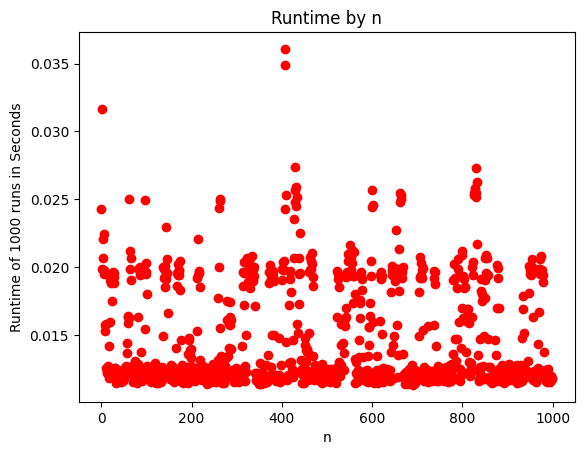

In [35]:
# implementing calculation, returning nth fibonacci number
def fib(n):
    return (S @ np.diag(np.power(D, n)) @ S_inv)[1,1]

N = 1000
fib_results = [round(fib(i),0) for i in range(N)]
times = [timeit.timeit(stmt='fib({})'.format(n), globals=globals(), number=1000) for n in range(N)]
print(fib_results[:10])
plt.title("Runtime by n")
plt.ylabel("Runtime of 1000 runs in Seconds")
plt.xlabel("n")
plt.plot(range(N), times, 'or')